## LP

In [1]:
using JuMP, Cbc 

m = Model(solver = CbcSolver()) 

@variable(m, 0 <= x <= 2)
@variable(m, 0 <= y <= 30)

@constraint(m, 1x + 5y <= 3.0) 

@objective(m, Max, 5x + 3y)

print(m)

status = solve(m) 

println("Objective value: ", getobjectivevalue(m))
println("x = ", getvalue(x))
println("y = ", getvalue(y))

Max 5 x + 3 y
Subject to
 x + 5 y <= 3
 0 <= x <= 2
 0 <= y <= 30
Objective value: 10.6
x = 2.0
y = 0.2


## MILP

In [2]:
using JuMP
using Cbc 

# Preparing an optimization model 
m = Model(solver = CbcSolver()) 

# Declaring variables
@variable(m, 0 <= x1 <= 10) 
@variable(m, x2 >= 0, Int) 
@variable(m, x3, Bin) 

# Setting the objective 
@objective(m, Max, x1 + 2x2 + 5x3) 

# Adding constraints 
@constraint(m, constraint1, -x1 + x2 + 3x3 <= -5)
@constraint(m, constraint2, x1 + 3x2 - 7x3 <= 10) 

# Printing the prepared optimization model 
print(m) 

# Solving the optimization problem 
solve(m) 

# Printing the optimal solutions obtained 
println("Optimal Solutions:") 
println("x1 = ", getvalue(x1)) 
println("x2 = ", getvalue(x2)) 
println("x3 = ", getvalue(x3))

Max x1 + 2 x2 + 5 x3
Subject to
 -x1 + x2 + 3 x3 <= -5
 x1 + 3 x2 - 7 x3 <= 10
 0 <= x1 <= 10
 x2 >= 0, integer
 x3 in {0,1}
Optimal Solutions:
x1 = 10.0
x2 = 2.0
x3 = 1.0


## Vector, Matrix, Array

In [3]:
# 3x1 vector
a = [1;
     2;
     3] 

# 1x3 vector
b = [4 5 6] 

# 2x3 matrix
A = [1 2 3; 
     4 5 6]

# Transpose
B = A' 

# Dot product
a = [1; 2; 3]
c = [7; 8; 9]
b = a' * c 
d = dot(a, c)

50

## Tuple

In [4]:
pairs = Array{ Tuple{ Int64, Int64}}( 3)

pairs[1] = (1, 2)
pairs[2] = (2, 3)
pairs[3] = (3, 4)

(3, 4)

## Plotting

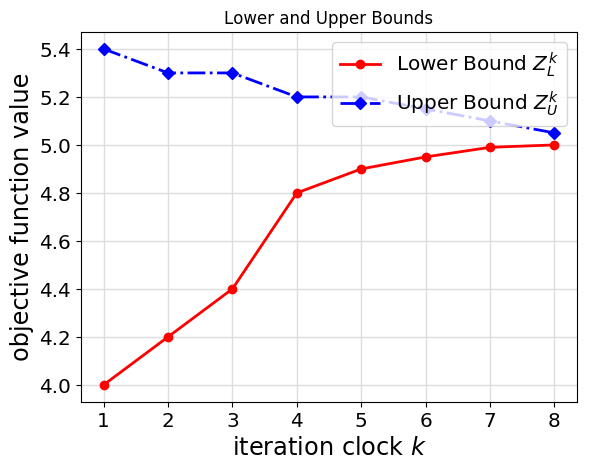

In [5]:
using PyPlot 

# Data 
lower_bound = [4.0, 4.2, 4.4, 4.8, 4.9, 4.95, 4.99, 5.00] 
upper_bound = [5.4, 5.3, 5.3, 5.2, 5.2, 5.15, 5.10, 5.05] 
iter = 1: 8 

# Creating a new figure object 
fig = figure() 

# Plotting two datasets 
plot(iter, lower_bound, color ="red", linewidth = 2.0, linestyle ="-", marker ="o", label = L"Lower Bound $Z^k_L$") 
plot(iter, upper_bound, color ="blue", linewidth = 2.0, linestyle ="-.", marker ="D", label = L"Upper Bound $Z^k_U$")

# Labeling axes 
xlabel(L"iteration clock $k$", fontsize="xx-large") 
ylabel("objective function value", fontsize="xx-large")

# Putting the legend and determining the location
legend(loc="upper right", fontsize="x-large") 

# Add grid lines 
grid( color ="#DDDDDD", linestyle="-", linewidth=1.0) 
tick_params( axis ="both", which="major", labelsize="x-large") 

# Title 
title("Lower and Upper Bounds") 

# Save the figure as PNG and PDF 
savefig("plot2.png") 
savefig("plot2.pdf") 

## Curve fitting

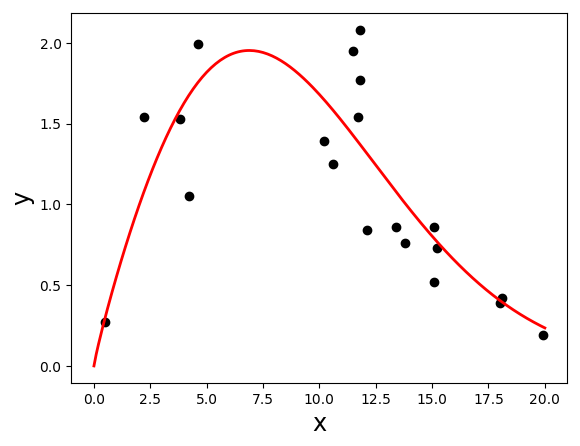

In [6]:
using LsqFit

xdata = [15.2; 19.9; 2.2; 11.8; 12.1; 18.1; 11.8; 13.4; 11.5; 0.5; 18.0; 10.2; 10.6; 13.8; 4.6; 3.8; 15.1; 15.1; 11.7; 4.2] 
ydata = [0.73; 0.19; 1.54; 2.08; 0.84; 0.42; 1.77; 0.86; 1.95; 0.27; 0.39; 1.39; 1.25; 0.76; 1.99; 1.53; 0.86; 0.52; 1.54; 1.05]

model(x, beta) = beta[1]*((x/beta[2]).^(beta[3]-1)).*(exp.(-(x/beta[2]).^beta[3]))

fit = curve_fit(model, xdata, ydata, [3.0, 8.0, 3.0])

# results of the fitting 
beta_fit = fit.param 
errors = estimate_errors( fit) 

# preparing the fitting evaluation
xfit = 0:0.1:20
yfit = model(xfit, fit.param)

# Creating a new figure object 
fig = figure() 

# Plotting two datasets 
plot(xdata, ydata, color="black", linewidth=2.0, marker="o", linestyle="None")
plot(xfit, yfit, color="red", linewidth=2.0)

# Labeling axes 
xlabel("x", fontsize="xx-large") 
ylabel("y", fontsize="xx-large")

# Save the figure as PNG and PDF 
savefig("fit_plot.png")
savefig("fit_plot.pdf") 

## Automatic Differentiation

In [33]:
using ForwardDiff 

f(x::Vector) = sum(sin, x) + prod(tan, x) * sum(sqrt, x)

g = x -> gradient(f, x)
h = x -> ForwardDiff.hessian(f, x)

x = rand(5)

5-element Array{Float64,1}:
 0.347344
 0.545923
 0.512134
 0.747582
 0.927538

In [34]:
g(x) 

5-element Array{Float64,1}:
 2.91957
 2.29223
 2.3644 
 2.00915
 1.91269

In [35]:
h(x)

5×5 Array{Float64,2}:
 1.62262  4.78376  4.96731  4.24619  4.37213
 4.78376  1.47337  3.60614  3.08268  3.17429
 4.96731  3.60614  1.46402  3.20096  3.29607
 4.24619  3.08268  3.20096  1.81733  2.81754
 4.37213  3.17429  3.29607  2.81754  2.77887

## Combinatorics

In [38]:
using Combinatorics

collect(combinations(1:7, 3))

35-element Array{Array{Int64,1},1}:
 [1, 2, 3]
 [1, 2, 4]
 [1, 2, 5]
 [1, 2, 6]
 [1, 2, 7]
 [1, 3, 4]
 [1, 3, 5]
 [1, 3, 6]
 [1, 3, 7]
 [1, 4, 5]
 [1, 4, 6]
 [1, 4, 7]
 [1, 5, 6]
 ⋮        
 [2, 5, 7]
 [2, 6, 7]
 [3, 4, 5]
 [3, 4, 6]
 [3, 4, 7]
 [3, 5, 6]
 [3, 5, 7]
 [3, 6, 7]
 [4, 5, 6]
 [4, 5, 7]
 [4, 6, 7]
 [5, 6, 7]